In [49]:
import pandas as pd
import cdsapi
import atlite
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np

In [50]:
df = pd.read_excel('CDS_Data_Validation\\2019-2022 Solar Profile SPP rev.xlsx', sheet_name = '2019-2022_Central',skiprows=4)
df = df.merge(pd.read_excel('CDS_Data_Validation\\2019-2022 Solar Profile SPP rev.xlsx', sheet_name = '2019-2022_North',skiprows=4))
print(df.columns)

Index(['REF', 'BCPG-N[MCC_BCP-N(MW)]', 'EAN-N[R4_EAN-N(MW)]',
       'NED-N[R1_NED-N(MW)]', 'SSP-N[R1_SSP-N(MW)]', 'EAL-N[R4_EAL-N(MW)]',
       'EAP-N[R4_EAP-N(MW)]'],
      dtype='object')


In [51]:
### Aggreate to hourly data by using mean function ###
df['index_time'] = pd.to_datetime(df["REF"].dt.strftime('%Y-%m-%d-%H'))
df = df.drop(columns=['REF'])
df = df.groupby(by=["index_time"], dropna=False).mean()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35065 entries, 2019-01-01 00:00:00 to 2023-01-01 00:00:00
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   BCPG-N[MCC_BCP-N(MW)]  35065 non-null  float64
 1   EAN-N[R4_EAN-N(MW)]    35065 non-null  float64
 2   NED-N[R1_NED-N(MW)]    35065 non-null  float64
 3   SSP-N[R1_SSP-N(MW)]    35065 non-null  float64
 4   EAL-N[R4_EAL-N(MW)]    35065 non-null  float64
 5   EAP-N[R4_EAP-N(MW)]    35065 non-null  float64
dtypes: float64(6)
memory usage: 1.9 MB
None


In [52]:
### To cap the generation by installed capacity  ###
print(df.columns)

Index(['BCPG-N[MCC_BCP-N(MW)]', 'EAN-N[R4_EAN-N(MW)]', 'NED-N[R1_NED-N(MW)]',
       'SSP-N[R1_SSP-N(MW)]', 'EAL-N[R4_EAL-N(MW)]', 'EAP-N[R4_EAP-N(MW)]'],
      dtype='object')


In [53]:
installed_capacity = [
    34.2,
    126.126,
    73,
    52,
    128.396,
    133.92
]

for i in range(len(df.columns)):
    df[df.columns[i]].loc[df[df.columns[i]] > installed_capacity[i]] = installed_capacity[i]
    df[df.columns[i]] = df[df.columns[i]]/installed_capacity[i]


data_actual = df.copy()
print(data_actual.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35065 entries, 2019-01-01 00:00:00 to 2023-01-01 00:00:00
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   BCPG-N[MCC_BCP-N(MW)]  35065 non-null  float64
 1   EAN-N[R4_EAN-N(MW)]    35065 non-null  float64
 2   NED-N[R1_NED-N(MW)]    35065 non-null  float64
 3   SSP-N[R1_SSP-N(MW)]    35065 non-null  float64
 4   EAL-N[R4_EAL-N(MW)]    35065 non-null  float64
 5   EAP-N[R4_EAP-N(MW)]    35065 non-null  float64
dtypes: float64(6)
memory usage: 1.9 MB
None


C:\Users\595078\AppData\Local\Temp\ipykernel_23272\1061966536.py:11: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[df.columns[i]].loc[df[df.columns[i]] > installed_capacity[i]] = installed_capacity[i]
C:\Users\595078\AppData\Local\Temp\ip

In [54]:
df = pd.DataFrame()
df = pd.concat([df,pd.read_csv('CDS_Data_Validation\\output_Thailand_Solar_2019_km2_10.0.csv')])
df['time_utcadj'] = pd.to_datetime(df['time_utcadj'])
df = pd.concat([df,pd.read_csv('CDS_Data_Validation\\output_Thailand_Solar_2020_km2_10.0.csv')])
df['time_utcadj'] = pd.to_datetime(df['time_utcadj'])
df = pd.concat([df,pd.read_csv('CDS_Data_Validation\\output_Thailand_Solar_2021_km2_10.0.csv')])
df['time_utcadj'] = pd.to_datetime(df['time_utcadj'])
df = pd.concat([df,pd.read_csv('CDS_Data_Validation\\output_Thailand_Solar_2022_km2_10.0.csv')])
df['time_utcadj'] = pd.to_datetime(df['time_utcadj'])
df = df.set_index('time_utcadj')

year = 2020
df = df.loc[df.index.year == year]
data_actual = data_actual.loc[data_actual.index.year == year]


In [55]:
name_list = data_actual.columns
name_list

Index(['BCPG-N[MCC_BCP-N(MW)]', 'EAN-N[R4_EAN-N(MW)]', 'NED-N[R1_NED-N(MW)]',
       'SSP-N[R1_SSP-N(MW)]', 'EAL-N[R4_EAL-N(MW)]', 'EAP-N[R4_EAP-N(MW)]'],
      dtype='object')

In [56]:
for i in name_list:
    print(i)
    print('Acutal PF = ',np.round(data_actual[i].sum() * 100 /len(data_actual),4))
    print('ERA5 PF = ',np.round(df[i].sum() * 100 /len(df),4))
    print('')

BCPG-N[MCC_BCP-N(MW)]
Acutal PF =  15.0187
ERA5 PF =  16.8662

EAN-N[R4_EAN-N(MW)]
Acutal PF =  15.9393
ERA5 PF =  17.1626

NED-N[R1_NED-N(MW)]
Acutal PF =  16.6817
ERA5 PF =  17.3059

SSP-N[R1_SSP-N(MW)]
Acutal PF =  16.6914
ERA5 PF =  17.3059

EAL-N[R4_EAL-N(MW)]
Acutal PF =  18.3832
ERA5 PF =  17.143

EAP-N[R4_EAP-N(MW)]
Acutal PF =  18.8253
ERA5 PF =  17.1694



In [57]:
for i in name_list:
    print(i)
    print('Acutal Gen MWh = ',np.round(data_actual[i].sum(),4))
    print('ERA5 Gen MWh = ',np.round(df[i].sum(),4))
    print('Diff from actual percen  = ', np.round((df[i].sum() - data_actual[i].sum())*100/data_actual[i].sum(),1))
    print('')

BCPG-N[MCC_BCP-N(MW)]
Acutal Gen MWh =  1319.2456
ERA5 Gen MWh =  1481.5281
Diff from actual percen  =  12.3

EAN-N[R4_EAN-N(MW)]
Acutal Gen MWh =  1400.1058
ERA5 Gen MWh =  1507.5664
Diff from actual percen  =  7.7

NED-N[R1_NED-N(MW)]
Acutal Gen MWh =  1465.3199
ERA5 Gen MWh =  1520.1535
Diff from actual percen  =  3.7

SSP-N[R1_SSP-N(MW)]
Acutal Gen MWh =  1466.1683
ERA5 Gen MWh =  1520.1535
Diff from actual percen  =  3.7

EAL-N[R4_EAL-N(MW)]
Acutal Gen MWh =  1614.7843
ERA5 Gen MWh =  1505.84
Diff from actual percen  =  -6.7

EAP-N[R4_EAP-N(MW)]
Acutal Gen MWh =  1653.6141
ERA5 Gen MWh =  1508.1586
Diff from actual percen  =  -8.8



In [58]:
gen_difffromactual = pd.DataFrame()
for i in name_list:
    gen_actual_month_list = [(data_actual[i].loc[data_actual.index.month == (j+1)].sum()) for j in range(12)]
    gen_era5_month_list = [(df[i].loc[df.index.month == (j+1)].sum()) for j in range(12)]
    gen_difffromactual_list = [(gen_era5_month_list[j] - gen_actual_month_list[j]) for j in range(12)]
    gen_difffromactual[i] = pd.DataFrame(gen_difffromactual_list)
print(np.round(gen_difffromactual,1))

    BCPG-N[MCC_BCP-N(MW)]  EAN-N[R4_EAN-N(MW)]  NED-N[R1_NED-N(MW)]  \
0                    27.9                 27.1                 18.6   
1                    25.1                 20.9                 15.5   
2                    19.5                 22.2                 13.8   
3                    18.9                 20.5                  3.0   
4                    10.2                 10.0                  7.4   
5                     3.0                  3.3                  1.9   
6                    -0.6                  4.3                  0.5   
7                    14.0                 -9.3                 -4.2   
8                    14.7                  1.3                 -4.9   
9                     1.1                 -5.9                 -4.6   
10                   11.5                  5.8                  4.0   
11                   16.9                  7.2                  3.9   

    SSP-N[R1_SSP-N(MW)]  EAL-N[R4_EAL-N(MW)]  EAP-N[R4_EAP-N(MW)]  
0       

In [59]:
plantfactor_actual_monthly = pd.DataFrame()
for i in name_list:
    pf_month_list = [(data_actual[i].loc[data_actual.index.month == (j+1)].sum()/len(data_actual.loc[data_actual.index.month == (j+1)])) for j in range(12)]
    
    plantfactor_actual_monthly[i] = pd.DataFrame(pf_month_list)

print("pf actual (%) = ",np.round(plantfactor_actual_monthly*100,1))

pf actual (%) =      BCPG-N[MCC_BCP-N(MW)]  EAN-N[R4_EAN-N(MW)]  NED-N[R1_NED-N(MW)]  \
0                    14.2                 14.8                 16.2   
1                    15.5                 16.9                 17.6   
2                    17.2                 17.2                 18.2   
3                    16.3                 17.0                 19.3   
4                    16.1                 17.1                 17.5   
5                    16.5                 16.5                 17.3   
6                    16.5                 16.3                 16.9   
7                    13.0                 15.4                 15.6   
8                    13.1                 15.5                 16.3   
9                    11.5                 10.9                 11.5   
10                   15.5                 16.4                 16.8   
11                   14.9                 17.3                 17.3   

    SSP-N[R1_SSP-N(MW)]  EAL-N[R4_EAL-N(MW)]  EAP-N[R4_EAP-

In [60]:
plantfactor_era5_monthly = pd.DataFrame()
for i in name_list:
    pf_month_list = [(df[i].loc[df.index.month == (j+1)].sum()/len(df.loc[df.index.month == (j+1)])) for j in range(12)]
    
    plantfactor_era5_monthly[i] = pd.DataFrame(pf_month_list)

print("pf era5 (%) = ",np.round(plantfactor_era5_monthly*100,1))

pf era5 (%) =      BCPG-N[MCC_BCP-N(MW)]  EAN-N[R4_EAN-N(MW)]  NED-N[R1_NED-N(MW)]  \
0                    17.9                 18.5                 18.7   
1                    19.1                 19.9                 19.8   
2                    19.8                 20.1                 20.1   
3                    19.0                 19.9                 19.7   
4                    17.4                 18.4                 18.5   
5                    17.0                 17.0                 17.5   
6                    16.4                 16.9                 16.9   
7                    14.9                 14.1                 15.1   
8                    15.1                 15.7                 15.6   
9                    11.7                 10.1                 10.8   
10                   17.1                 17.2                 17.4   
11                   17.2                 18.2                 17.8   

    SSP-N[R1_SSP-N(MW)]  EAL-N[R4_EAL-N(MW)]  EAP-N[R4_EAP-N(

In [61]:
plantfactor_difffromactual = pd.DataFrame()
for i in name_list:
    pf_actual_month_list = [(data_actual[i].loc[data_actual.index.month == (j+1)].sum()/len(data_actual.loc[data_actual.index.month == (j+1)])) for j in range(12)]
    pf_era5_month_list = [(df[i].loc[df.index.month == (j+1)].sum()/len(df.loc[df.index.month == (j+1)])) for j in range(12)]
    pf_difffromactual_list = [( pf_era5_month_list[j] - pf_actual_month_list[j] ) / pf_actual_month_list[j] for j in range(12)]
    plantfactor_difffromactual[i] = pd.DataFrame(pf_difffromactual_list)
print("pf era5 diff from actual (%) = ",np.round(plantfactor_difffromactual*100,1))

pf era5 diff from actual (%) =      BCPG-N[MCC_BCP-N(MW)]  EAN-N[R4_EAN-N(MW)]  NED-N[R1_NED-N(MW)]  \
0                    26.4                 24.5                 15.5   
1                    23.4                 17.8                 12.7   
2                    15.3                 17.4                 10.2   
3                    16.1                 16.7                  2.1   
4                     8.5                  7.9                  5.7   
5                     2.6                  2.8                  1.5   
6                    -0.5                  3.6                  0.4   
7                    14.4                 -8.2                 -3.7   
8                    15.6                  1.2                 -4.2   
9                     1.3                 -7.3                 -5.4   
10                   10.3                  4.9                  3.3   
11                   15.3                  5.6                  3.0   

    SSP-N[R1_SSP-N(MW)]  EAL-N[R4_EAL-N(MW)]

Measure, time series similarity

In [62]:
name_list = data_actual.columns
name_list

Index(['BCPG-N[MCC_BCP-N(MW)]', 'EAN-N[R4_EAN-N(MW)]', 'NED-N[R1_NED-N(MW)]',
       'SSP-N[R1_SSP-N(MW)]', 'EAL-N[R4_EAL-N(MW)]', 'EAP-N[R4_EAP-N(MW)]'],
      dtype='object')

EAN-N[R4_EAN-N(MW)]


<Axes: xlabel='time_utcadj'>

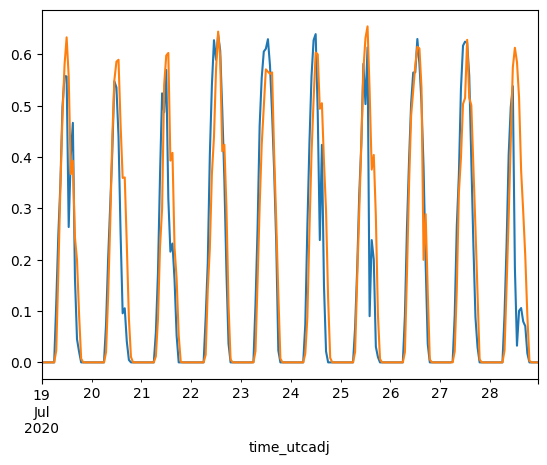

In [63]:
name_index = 1
day = 200
spanday = 10
print(name_list[name_index])
data_actual[name_list[name_index]][(day*24):((day*24)+(24*spanday))].plot()
df[name_list[name_index]][(day*24):((day*24)+(24*spanday))].plot()


In [64]:
import numpy as np

def calc_euclidean(actual, predic):
    return np.sqrt(np.sum((actual - predic) ** 2))

def calc_mae(actual, predic):
    return np.mean(np.abs((actual - predic)))


print(" year ======   ",year)
print("                   ")
for name_index in range(len(name_list)):
    ts = pd.DataFrame()
    ts['actual'] = data_actual[name_list[name_index]]
    ts['era5'] = df[name_list[name_index]]
    print(name_list[name_index])
    ## Pearson Correlation ##   
    print('plant = ', name_list[name_index])
    print("          ")
    print("     correalation     ")
    print(ts.loc[ts['actual'] > 0].corr())
    print("          ")
    print('calc_euclidean',calc_euclidean(ts['actual'].loc[ts['actual'] > 0],ts['era5'].loc[ts['actual'] > 0]))
    print('calc_mae = ',calc_mae(ts['actual'].loc[ts['actual'] > 0],ts['era5'].loc[ts['actual'] > 0]))
    print("     ")


 year ======    2020
                   
BCPG-N[MCC_BCP-N(MW)]
plant =  BCPG-N[MCC_BCP-N(MW)]
          
     correalation     
          actual      era5
actual  1.000000  0.845083
era5    0.845083  1.000000
          
calc_euclidean 8.082596085192854
calc_mae =  0.08967178272002567
     
EAN-N[R4_EAN-N(MW)]
plant =  EAN-N[R4_EAN-N(MW)]
          
     correalation     
          actual      era5
actual  1.000000  0.847139
era5    0.847139  1.000000
          
calc_euclidean 7.921051157359808
calc_mae =  0.09224852958658758
     
NED-N[R1_NED-N(MW)]
plant =  NED-N[R1_NED-N(MW)]
          
     correalation     
          actual      era5
actual  1.000000  0.830648
era5    0.830648  1.000000
          
calc_euclidean 8.461142312638266
calc_mae =  0.09892042832031384
     
SSP-N[R1_SSP-N(MW)]
plant =  SSP-N[R1_SSP-N(MW)]
          
     correalation     
          actual      era5
actual  1.000000  0.856454
era5    0.856454  1.000000
          
calc_euclidean 8.683145414413612
calc_mae 